# Data Description

The dataset used for this project is from Cortex, Cerdeira, Almeida, Matos, and Reis' Wine Quality paper (http://dx.doi.org/10.1016/j.dss.2009.05.016).

The wine quality dataset is publicly available at http://www3.dsi.uminho.pt/pcortez/wine/ in the primary author's website or at https://archive.ics.uci.edu/dataset/186/wine+quality at the UC Irvine Machine Learning Repository. The file is provided in CSV format. A sample of both the red and white wine is shown below along with the data shape and column names.

The dataset has 12 columns, 11 of which are attributes and 1 target variable:


*   **Fixed Acidity** - Measured in units of g(tartaric acid)/$dm^{3}$
*   **Volatile Acidity** - Measured in units of g(acetic acid)/$dm^{3}$
*   **Citric Acid** - Measured in units of g/$dm^{3}$
*   **Residual Sugar** - Measured in units of g/$dm^{3}$
*   **Chlorides** - Measured in units of g(sodium chloride)/$dm^{3}$
*   **Free Sulfur Dioxide** - Measured in units of mg/$dm^{3}$
*   **Total Sulfur Dioxide** - Measured in units of mg/$dm^{3}$
*   **Density** - Measured in units of g/$cm^{3}$
*   **pH** - Measured on a scale from 0.0 to 14.0
*   **Sulphates** - Measured in units of g(potassium sulphate)/$dm^{3}$
*   **Alcohol** - Measured by vol.%
*   **Quality** - Measured on a scale from 0 to 10; target variable



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv('./data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('./data/winequality-white.csv', sep = ';')

In [3]:
print(red_wine.columns)
print(red_wine.shape)
red_wine.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(white_wine.columns)
print(white_wine.shape)
white_wine.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory Data Analysis (EDA)

### Red Wine

In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values present in the red wine dataset, therefore we don't need to impute any values.

In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It appears that our target variable `quality` has an actual range of 3-8 on the 0-10 scale. Our continuous predictors have a variety of different ranges and scales that we will have to adjust accordingly before feeding them into our chosen model(s).

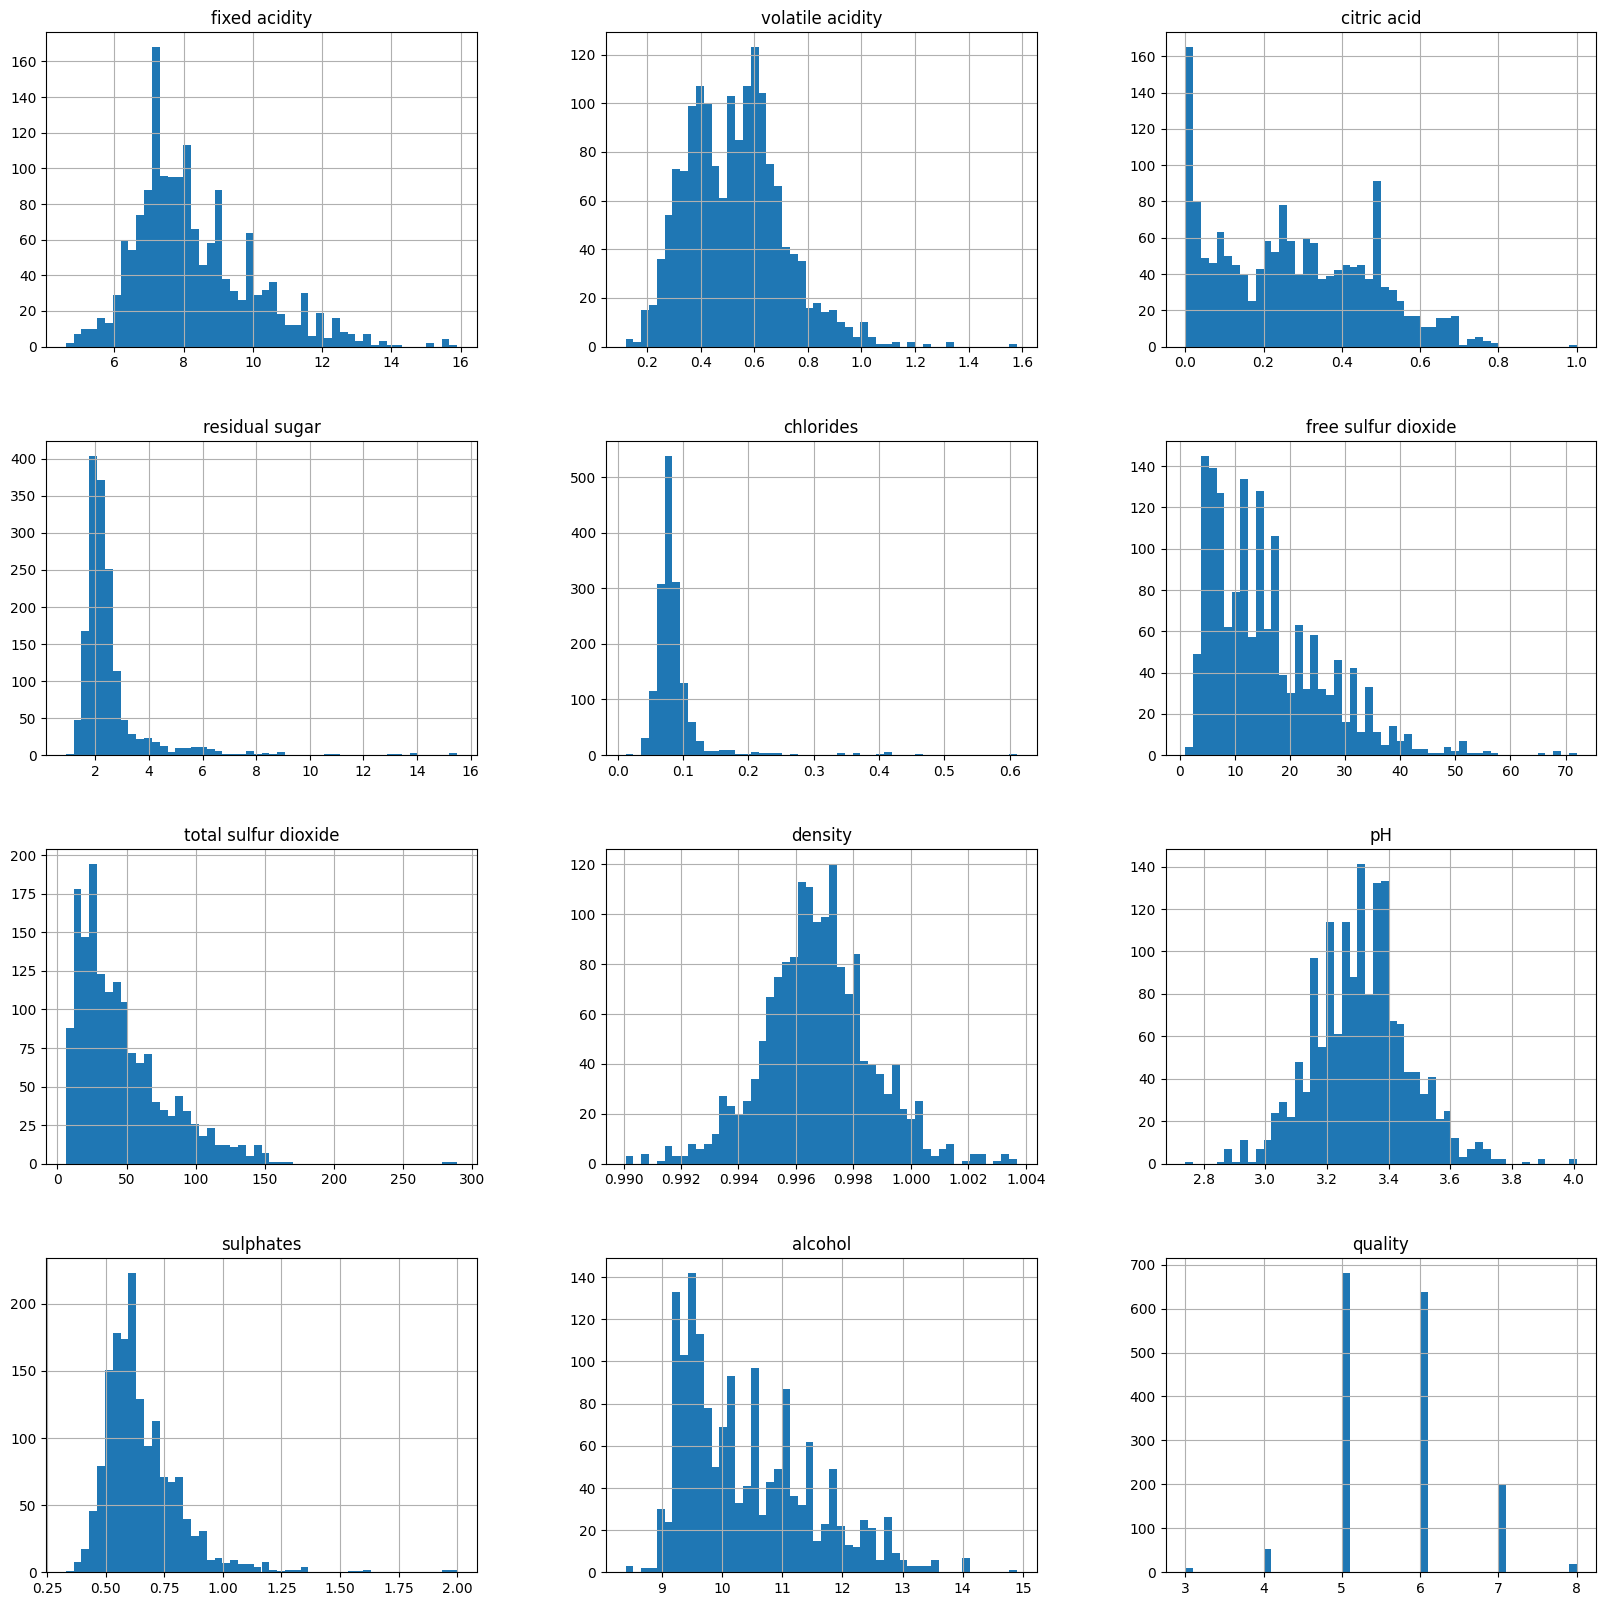

In [7]:
red_wine.hist(bins=50, figsize=(20,20))
plt.show()

Observations:

- We confirm again the predictors have a variety of scales.
- Most of the predictors have right-skewed distributions, with only `density` and `pH` appearing closer to a normal distribution. These skewed predictors should be transformed before being fed into a predictive model.
- `citric acid` has a large number of entries with a value of `0.0`; this could be because it is a lower bound for this measurement or due to the precision of the devices used to measure this property (which we see is up to 2 decimal places in the dataset).
- Target variable `quality` is imbalanced, which will require performing stratified sampling.

In [8]:
# Demonstrating the progression/scale of the citric acid values
red_wine['citric acid'].value_counts().sort_index().head(10)

citric acid
0.00    132
0.01     33
0.02     50
0.03     30
0.04     29
0.05     20
0.06     24
0.07     22
0.08     33
0.09     30
Name: count, dtype: int64

In [9]:
# Percentage distribution of the classes of the target variable
red_wine['quality'].value_counts().sort_index() * 100 / red_wine.shape[0]

quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
Name: count, dtype: float64

We also look at the correlation matrix between the red wine variables:

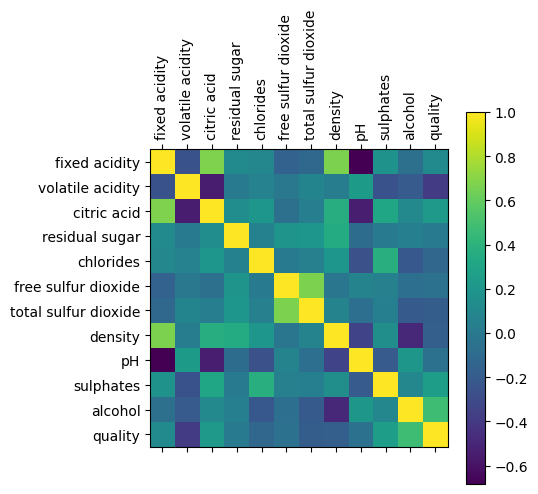

In [10]:
plt.matshow(red_wine.corr())

plt.xticks(range(red_wine.shape[1]), red_wine.columns, rotation=90)
plt.yticks(range(red_wine.shape[1]), red_wine.columns)

plt.colorbar()
plt.show()

In [11]:
corr = red_wine.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


We observe that the three most correlated features with red wine `quality` are `alcohol`, `volatile acidity`, and `sulphates`. There are also some notable correlations between predictors, as seen in `fixed acidity` with `citric acid`, `density`, and `pH`. This indicates we should employ some feature selection techniques in our pipeline for red wine.

### White Wine

In [12]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no null values present in the white wine dataset, therefore we don't need to impute any values.

In [13]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As is the case with the red wine, the predictors in the white wine dataset also have different scales. Here, the target variable `quality` has a range of 3-9 on the 0-10 scale.

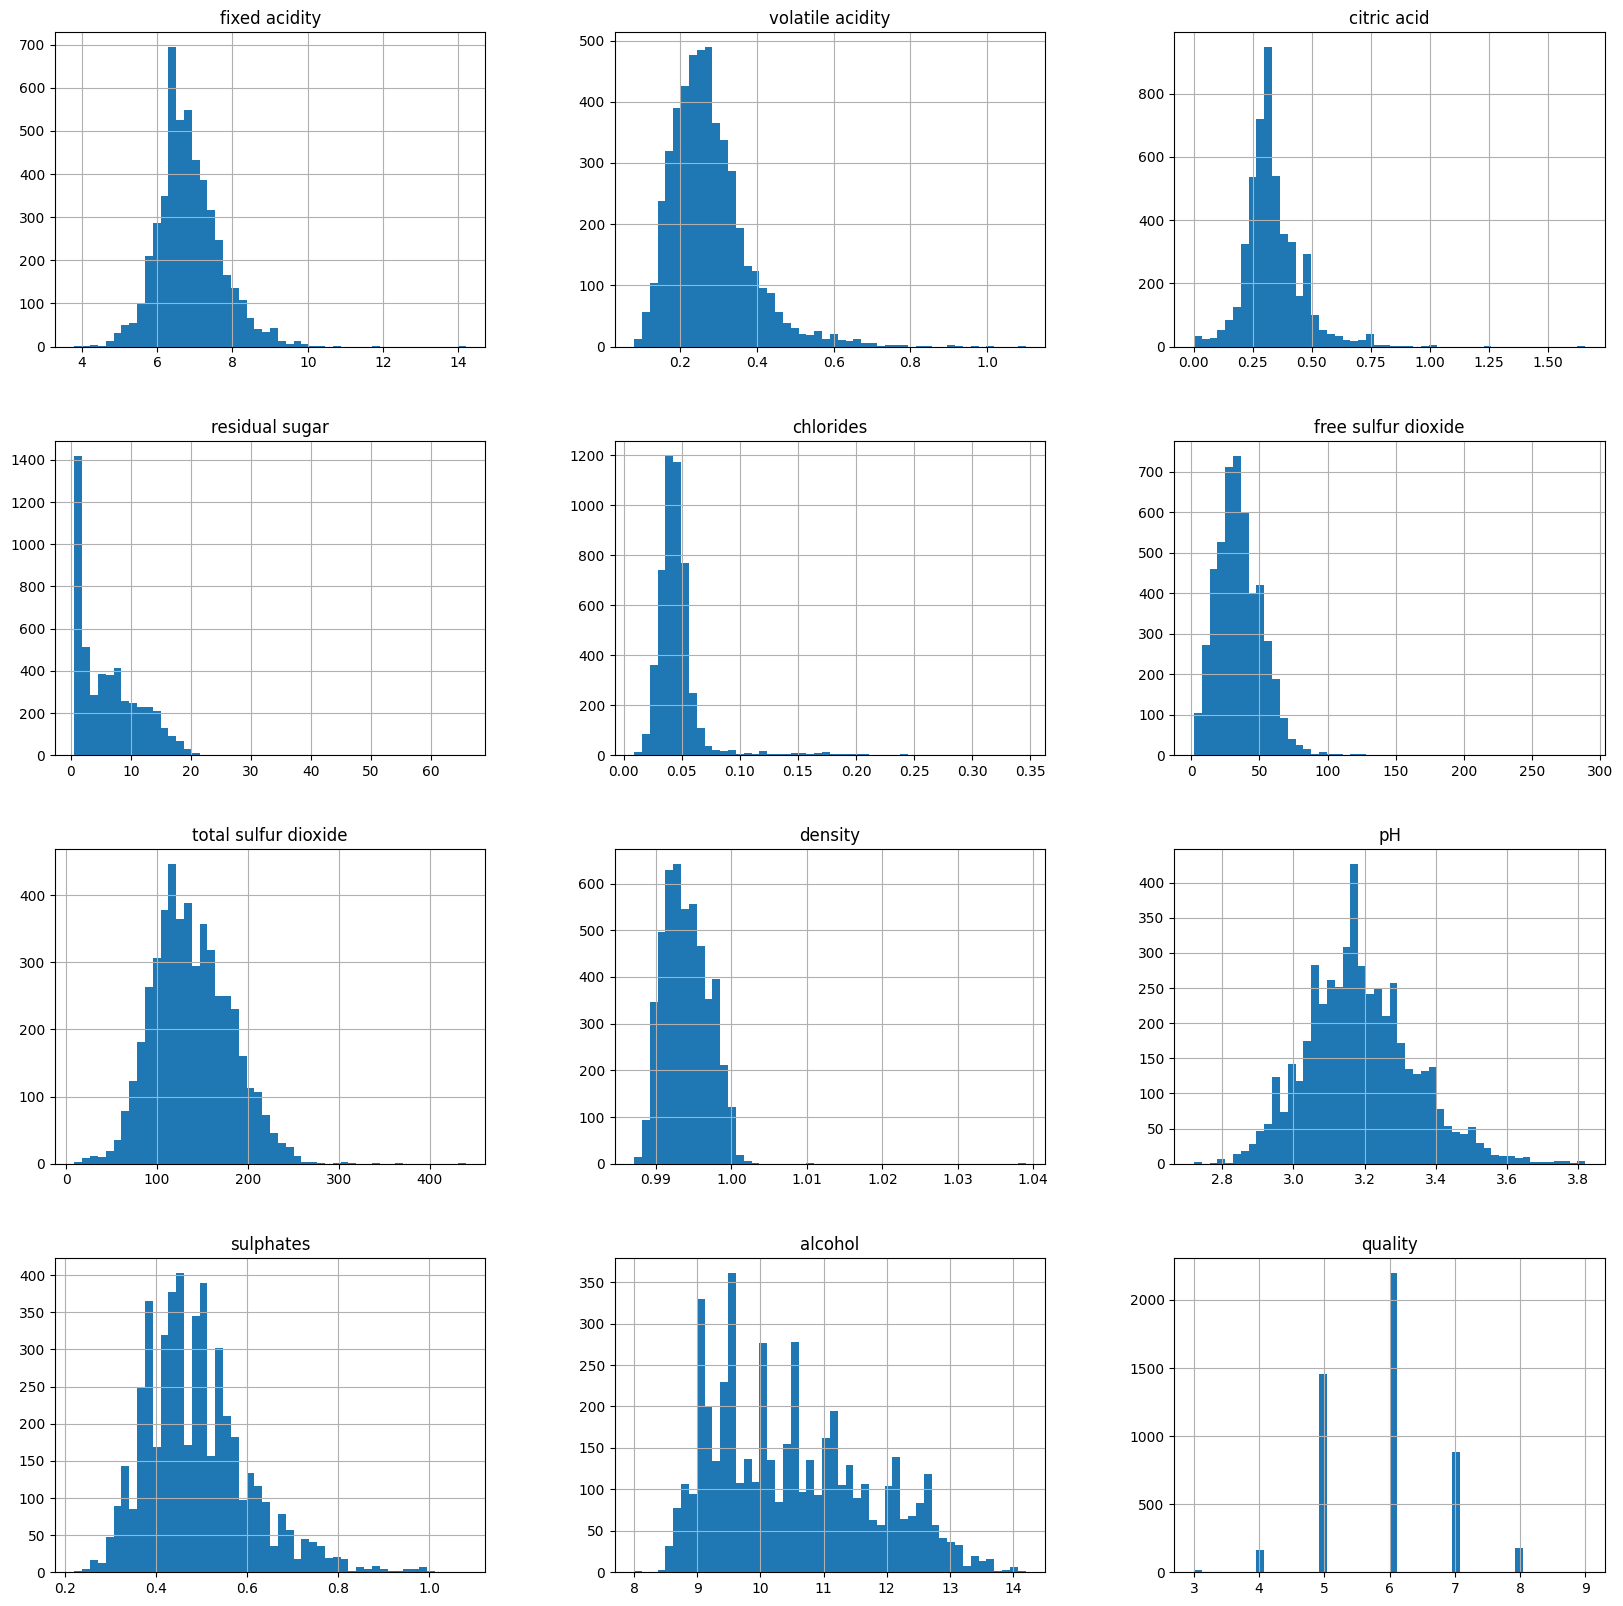

In [14]:
white_wine.hist(bins=50, figsize=(20,20))
plt.show()

Our observations from the white wine data are similar to our observations from the red wine data.

- We confirm again the predictors have a variety of scales.
- Most of the predictors have right-skewed distributions, with only `pH` appearing closer to a normal distribution.
- Target variable `quality` is imbalanced, which will require performing stratified sampling.

In [15]:
# Percentage distribution of the classes of the target variable
white_wine['quality'].value_counts().sort_index() * 100 / white_wine.shape[0]

quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
Name: count, dtype: float64

We also look at the correlation matrix between the white wine variables:

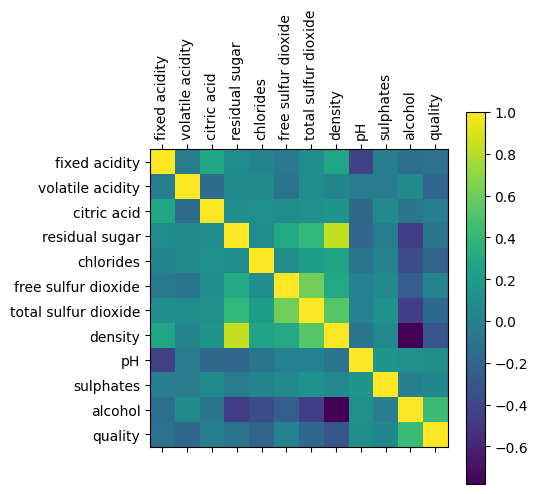

In [16]:
plt.matshow(white_wine.corr())

plt.xticks(range(white_wine.shape[1]), white_wine.columns, rotation=90)
plt.yticks(range(white_wine.shape[1]), white_wine.columns)

plt.colorbar()
plt.show()

In [17]:
corr = white_wine.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


We observe that white wine has different correlated features for its `quality` rating. Here, the three most correlated features with `quality` are `alcohol`, `density`, and `chlorides`. As in the red wine data, we also see correlation between predictors for white wine (e.g. `density` has high correlation with `residual sugar` and `alcohol`). To handle this, we will need to perform feature selection for our white wine pipeline as well.

# Proposed Algorithms

The target variable for our dataset is a quality rating that has a scale of 0-10. This allows us to tackle the prediction problem as a regression problem or a classification problem by treating the quality ratings as individual class labels. Due to this, we want to compare models that have regression and classification implementations and see which performs the best for our prediction problem of determining wine quality ratings.

The models we aim to investigate are:
- **Linear regression**. It establishes a baseline for a regression model and is used by the authors that compiled our dataset.
- **(Multiclass) Logistic regression**. It establishes a baseline for a classification model.
- **Support Vector Machine**. Also used by the authors of the dataset and can be implemented as both regression and classification models.

# Citation to use dataset

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.